# Class 13 Exercises — Topic Modeling Solutions

In these lessons, we're learning about a text analysis method called *topic modeling*. This method will help us identify the main topics or discourses within a collection of texts.

In this particular lesson, we're going to use [Little MALLET Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper), a Python wrapper for [MALLET](http://mallet.cs.umass.edu/topics.php), to topic model 379 obituaries published by *The New York Times*. This dataset is based on data originally collected by Matt Lavin for his *Programming Historian* [TF-IDF tutorial](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf#lesson-dataset). I have re-scraped the obituaries so that the subject's name and death year is included in each text file name, and I have added 13 more ["Overlooked"](https://www.nytimes.com/interactive/2018/obituaries/overlooked.html) obituaries, including [Karen Spärck Jones](https://www.nytimes.com/2019/01/02/obituaries/karen-sparck-jones-overlooked.html), the computer scientist who introduced TF-IDF.

___

## Install and Import Packages

To use `little_mallet_wrapper` outside JupyterHub, you will need to install it.

In [ ]:
#!pip install little_mallet_wrapper

Import `little_mallet_wrapper` and the data viz library `seaborn`. We're also going to import [`glob`](https://docs.python.org/3/library/glob.html) and [`pathlib`](https://docs.python.org/3/library/pathlib.html#basic-use) for working with files and the file system.

In [6]:
import little_mallet_wrapper
import seaborn

import glob
from pathlib import Path

## Process Texts

First, we're going to review how to open and read text files with Python, and we're going to test out one of `little_mallet_wrapper`'s functions. This workflow will be essential for pre-processing the NYT obituaries for topic modeling.

Open and read the text file for Ada Lovelace's obituary, which has the following relative filepath: "../NYT-Obituaries/1852-Ada-Lovelace.txt"

In [27]:
open("../NYT-Obituaries/1852-Ada-Lovelace.txt").read()

'A gifted mathematician who is now recognized as the first computer programmer.By CLAIRE CAIN MILLER\n\n A century before the dawn of the computer age, Ada Lovelace imagined the modern-day, general-purpose computer. It could be programmed to follow instructions, she wrote in 1843. It could not just calculate but also create, as it “weaves algebraic patterns just as the Jacquard loom weaves flowers and leaves.” The computer she was writing about, the British inventor Charles Babbage’s Analytical Engine, was never built. But her writings about computing have earned Lovelace — who died of uterine cancer in 1852 at 36 — recognition as the first computer programmer. \n\n The program she wrote for the Analytical Engine was to calculate the seventh Bernoulli number. (Bernoulli numbers, named after the Swiss mathematician Jacob Bernoulli, are used in many different areas of mathematics.) But her deeper influence was to see the potential of computing. The machines could go beyond calculating nu

Assign the contents of Ada Lovelace's obituary to the variable `text`

In [28]:
text = open("../NYT-Obituaries/1852-Ada-Lovelace.txt").read()

Now run `little_mallet_wrapper.process_string()` on `text`

In [29]:
little_mallet_wrapper.process_string(text, numbers='remove')

'gifted mathematician recognized first computer programmer claire cain miller century dawn computer age ada lovelace imagined modern day general purpose computer could programmed follow instructions wrote could calculate also create weaves algebraic patterns jacquard loom weaves flowers leaves computer writing british inventor charles babbage analytical engine never built writings computing earned lovelace died uterine cancer recognition first computer programmer program wrote analytical engine calculate seventh bernoulli number bernoulli numbers named swiss mathematician jacob bernoulli used many different areas mathematics deeper influence see potential computing machines could beyond calculating numbers said understand symbols used create music art insight would become core concept digital age walter isaacson wrote book innovators piece content data information music text pictures numbers symbols sounds video could expressed digital form manipulated machines also explored ramificati

## Working with Multiple Text Files — Glob to the Rescue!

To topic model the *NYT* obituaries, we need to process and work with dozens of text files. But how can we work with multiple text files at the same time?

This is where the `glob` library comes in handy. We can use `glob.glob()` to get a list of filepaths that match a certain pattern. Below, we are matching any file (`*`) in the "NYT-Obituaries" directory that has the file extension `.txt`

In [3]:
glob.glob( "../NYT-Obituaries/*.txt")

['../texts/history/NYT-Obituaries/1945-Adolf-Hitler.txt',
 '../texts/history/NYT-Obituaries/1915-F-W-Taylor.txt',
 '../texts/history/NYT-Obituaries/1975-Chiang-Kai-shek.txt',
 '../texts/history/NYT-Obituaries/1984-Ethel-Merman.txt',
 '../texts/history/NYT-Obituaries/1953-Jim-Thorpe.txt',
 '../texts/history/NYT-Obituaries/1964-Nella-Larsen.txt',
 '../texts/history/NYT-Obituaries/1955-Margaret-Abbott.txt',
 '../texts/history/NYT-Obituaries/1984-Lillian-Hellman.txt',
 '../texts/history/NYT-Obituaries/1959-Cecil-De-Mille.txt',
 '../texts/history/NYT-Obituaries/1928-Mabel-Craty.txt',
 '../texts/history/NYT-Obituaries/1973-Eddie-Rickenbacker.txt',
 '../texts/history/NYT-Obituaries/1989-Ferdinand-Marcos.txt',
 '../texts/history/NYT-Obituaries/1991-Martha-Graham.txt',
 '../texts/history/NYT-Obituaries/1997-Deng-Xiaoping.txt',
 '../texts/history/NYT-Obituaries/1938-George-E-Hale.txt',
 '../texts/history/NYT-Obituaries/1885-Ulysses-Grant.txt',
 '../texts/history/NYT-Obituaries/1909-Sarah-Orne-Je

Below, we are matching any files that starts with 1945 (`1945*`) in the "NYT-Obituaries" directory and have the file extension `.txt`

In [32]:
glob.glob( "../NYT-Obituaries/1945*.txt")

['../NYT-Obituaries/1945-Adolf-Hitler.txt',
 '../NYT-Obituaries/1945-Bela-Bartok.txt',
 '../NYT-Obituaries/1945-Ernie-Pyle.txt',
 '../NYT-Obituaries/1945-Harry-S-Truman.txt',
 '../NYT-Obituaries/1945-George-Patton.txt',
 '../NYT-Obituaries/1945-FDR.txt',
 '../NYT-Obituaries/1945-Jerome-Kern.txt']

Below, we are matching any files that starts with 1990 (`1990*`) in the "NYT-Obituaries" directory and have the file extension `.txt`

In [33]:
glob.glob( "../NYT-Obituaries/1990*.txt")

['../NYT-Obituaries/1990-Leonard-Bernstein.txt',
 '../NYT-Obituaries/1990-Erte.txt',
 '../NYT-Obituaries/1990-Ralph-David-Abernathy.txt',
 '../NYT-Obituaries/1990-Rex-Harrison.txt',
 '../NYT-Obituaries/1990-Greta-Garbo.txt',
 '../NYT-Obituaries/1990-Sammy-Davis-Jr.txt']

Save the all the text files in "NYT-Obituaries" to the variable `filenames`

In [49]:
directory = "../NYT-Obituaries"
filenames = glob.glob(f"{directory}/*.txt")

## Get Training Data From Text Files

Next, we need to process our texts with the function `little_mallet_wrapper.process_string()`. This function will take a text file and transform it to lowercase as well as remove stopwords, punctuation, and numbers.

Complete the code below to iterate through all the filenames, open and read each file, process the text, and then add the processed text to the list `training_data`.

In [51]:
#Make a list of all pre-processed NYT obituaries
training_data = []

for file in filenames:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)

We will also make a master list of the original text of the obituaries for future reference.

In [23]:
#Make a list of all original NYT obituaries (not pre-processed)
original_texts = []

for file in filenames:
    text = open(file, encoding='utf-8').read(
    original_texts.append(text)

Here, we will extract the relevant part of each file name by using [`Path().stem`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.stem), which conveniently extracts just the last part of the file path without the ".txt" file extension.

In [65]:
obit_titles = [Path(file).stem for file in filenames]

Examine the first item in the list:

In [ ]:
obit_titles[0]

## Setting Up and Training the Topic Model

We can get training data summary statistics by using the function `print_dataset_stats()`.

In [52]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 379
Mean Number of Words per Document: 1314.6
Vocabulary Size: 35983


Since Little MALLET Wrapper is a Python package built around MALLET, we need to tell it where the bigger, Java-based MALLET lives.

Below we set the number of topics we want to return, as well as file paths for our topic modeling results. If you'd like to change this output location, simply change `output_directory_path` below.

In [53]:
num_topics = 15

path_to_mallet = '/home/jovyan/course_materials/mallet/bin/mallet'
#No need to change anything below here
training_data = training_data

#Set output directory
output_directory_path = 'topic-model-output/'

#Create output directory
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

#Create output files
path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

Finally, we can train our topic model with `little_mallet_wrapper.quick_train_topic_model()`.

In [54]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                              output_directory_path,
                                              num_topics,
                                              training_data)

Importing data...
Complete
Training topic model...
Complete


([['company',
   'business',
   'times',
   'new',
   'ford',
   'paper',
   'york',
   'ochs',
   'oil',
   'news',
   'rockefeller',
   'newspaper',
   'pulitzer',
   'luce',
   'hill',
   'carnegie',
   'money',
   'getty',
   'barnum',
   'journalism'],
  ['said',
   'years',
   'one',
   'also',
   'new',
   'first',
   'later',
   'two',
   'many',
   'life',
   'wrote',
   'like',
   'called',
   'time',
   'became',
   'american',
   'could',
   'died',
   'often',
   'man'],
  ['grant',
   'gen',
   'general',
   'army',
   'upon',
   'president',
   'said',
   'fort',
   'command',
   'douglass',
   'men',
   'lee',
   'troops',
   'good',
   'battle',
   'military',
   'mckinley',
   'union',
   'sherman',
   'secretary'],
  ['war',
   'general',
   'united',
   'hitler',
   'army',
   'german',
   'states',
   'military',
   'france',
   'french',
   'american',
   'germany',
   'nations',
   'secretary',
   'world',
   'government',
   'macarthur',
   'churchill',
   'pers

## Display Topics and Top Words

To examine the 15 topics that the topic model extracted from the *NYT* obituaries, we can use `load_topic_keys()`.

The `load_topic_keys()` function will read and process the MALLET topic model output from your JupyterHub, specifically the file "mallet.topic_keys.15".

In [56]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)
topics

[['company',
  'business',
  'times',
  'new',
  'ford',
  'paper',
  'york',
  'ochs',
  'oil',
  'news',
  'rockefeller',
  'newspaper',
  'pulitzer',
  'luce',
  'hill',
  'carnegie',
  'money',
  'getty',
  'barnum',
  'journalism'],
 ['said',
  'years',
  'one',
  'also',
  'new',
  'first',
  'later',
  'two',
  'many',
  'life',
  'wrote',
  'like',
  'called',
  'time',
  'became',
  'american',
  'could',
  'died',
  'often',
  'man'],
 ['grant',
  'gen',
  'general',
  'army',
  'upon',
  'president',
  'said',
  'fort',
  'command',
  'douglass',
  'men',
  'lee',
  'troops',
  'good',
  'battle',
  'military',
  'mckinley',
  'union',
  'sherman',
  'secretary'],
 ['war',
  'general',
  'united',
  'hitler',
  'army',
  'german',
  'states',
  'military',
  'france',
  'french',
  'american',
  'germany',
  'nations',
  'secretary',
  'world',
  'government',
  'macarthur',
  'churchill',
  'pershing',
  'president'],
 ['soviet',
  'mao',
  'party',
  'china',
  'communist'

Complete the code below to iterate through the list `topics` and print out each topic number and list of topic words.

In [31]:
for number, topic in enumerate(topics):
    print(f"✨Topic {number}✨\n\n{topic}\n")

✨Topic 0✨

['art', 'paris', 'moses', 'picasso', 'work', 'artist', 'york', 'painting', 'new', 'schulz', 'pictures', 'modern', 'wright', 'works', 'disney', 'brown', 'painter', 'charlie', 'museum', 'arts']

✨Topic 1✨

['music', 'band', 'jazz', 'piano', 'sinatra', 'musical', 'composer', 'goodman', 'new', 'york', 'orchestra', 'concert', 'stravinsky', 'armstrong', 'bernstein', 'musicians', 'playing', 'davis', 'style', 'played']

✨Topic 2✨

['university', 'professor', 'research', 'science', 'institute', 'scientific', 'oppenheimer', 'atomic', 'prize', 'society', 'also', 'human', 'dewey', 'theory', 'nobel', 'work', 'vaccine', 'scientist', 'received', 'freud']

✨Topic 3✨

['one', 'years', 'first', 'said', 'time', 'new', 'later', 'would', 'world', 'life', 'two', 'many', 'made', 'man', 'year', 'also', 'could', 'became', 'american', 'old']

✨Topic 4✨

['black', 'court', 'justice', 'rights', 'warren', 'king', 'negro', 'civil', 'white', 'law', 'supreme', 'case', 'marshall', 'said', 'negroes', 'blacks

## Load Topic Distributions

MALLET also calculates the likely mixture of these topics for every single obituary in the corpus. This mixture is called a probability distribution.

To get the topic distributions, we're going to use the `little_mallet_wrapper.load_topic_distributions()` function, which will read and process the MALLET topic model output, specifically the file "mallet.topic_distributions.15". 

In [62]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

If we look at the 32nd topic distribution in this list of `topic_distributions`, which corresponds to Marilyn Monroe's obituary, we will see a list of 15 probabilities. This  list corresponds to the likelihood that each of the 15 topics exists in Marilyn Monroe's obituary.

In [58]:
topic_distributions[32]

[0.0002924745593033432,
 0.5057537008345722,
 0.020318728565333014,
 0.0002775921348883546,
 0.00013220809294634195,
 0.00013234846736525903,
 0.0002909998392639678,
 0.005633276388317373,
 0.00013454915078349515,
 0.009666052445920831,
 0.00016388586714871227,
 0.034245666544678165,
 0.017215012521558572,
 0.19624923481520729,
 0.20949426977271327]

## Explore Heatmap of Topics and Texts

We can visualize and compare these topic probability distributions with a heatmap by using the `little_mallet_wrapper.plot_categories_by_topics_heatmap()` function.

We have everything we need for the heatmap except for our list of target_labels, the sample of texts that we’d like to visualize and compare with the heatmap. Below we make our list of desired target labels.

In [67]:
target_labels = ['1852-Ada-Lovelace', '1885-Ulysses-Grant',
                 '1900-Nietzsche', '1931-Ida-B-Wells', '1940-Marcus-Garvey',
                 '1941-Virginia-Woolf', '1954-Frida-Kahlo', '1962-Marilyn-Monroe',
                 '1963-John-F-Kennedy', '1964-Nella-Larsen', '1972-Jackie-Robinson',
                 '1973-Pablo-Picasso', '1984-Ray-A-Kroc','1986-Jorge-Luis-Borges', '1991-Miles-Davis',
                 '1992-Marsha-P-Johnson', '1993-Cesar-Chavez']

# If you'd like to make a random list of target labels, you can uncomment and run the code below.
#import random
#target_labels = random.sample(obit_titles, 10)

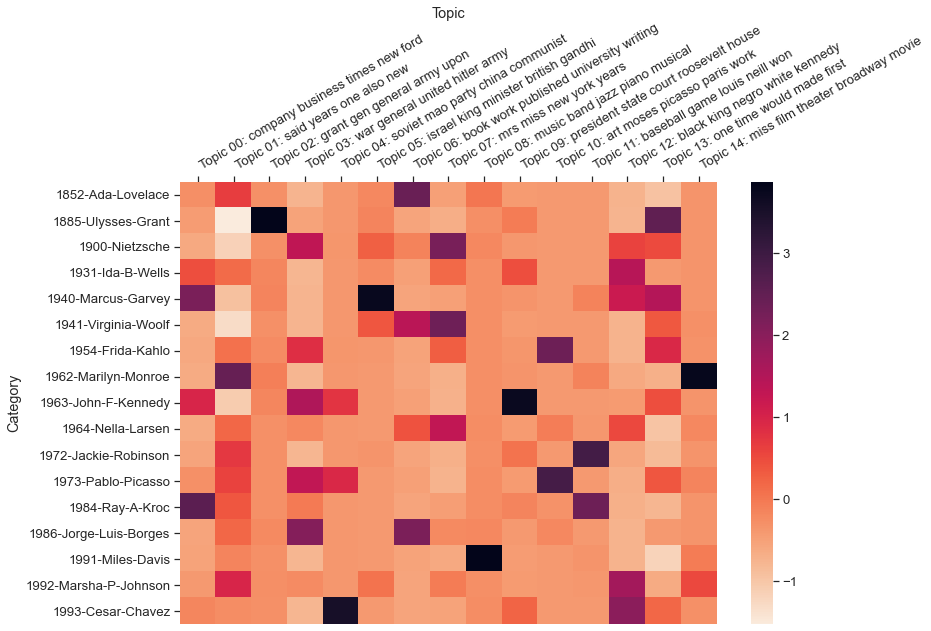

In [68]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(obit_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (13, 9)
                                     )

## Examine Top Documents

The functions below will allow us to find the documents (the original texts of the NYT obituaries or their titles) that have the highest probability of containing certain topics.

In [69]:
from IPython.display import Markdown, display
import re

def make_md(string):
    """A function that transforms string data into Markdown
    so it can be nicely formatted with bolding and emojis
    """
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):
    
    """A function that shows the top documents for a given set of topic distributions
    and a specific topic number
    """
    
    sorted_data = sorted([(_distribution[topic_index], _document) for _distribution, _document in zip(topic_distributions, docs)], reverse=True)
    topic_words = topics[topic_index]
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")
    
    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words:
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

Examine the top 5 NYT obituary article titles for the Topic 0

In [70]:
get_top_docs(obit_titles, topic_distributions, topic_index=0, n=5)

### ✨Topic 0✨

['company', 'business', 'times', 'new', 'ford', 'paper', 'york', 'ochs', 'oil', 'news', 'rockefeller', 'newspaper', 'pulitzer', 'luce', 'hill', 'carnegie', 'money', 'getty', 'barnum', 'journalism']

---

✨  
**Topic Probability**: 0.42538560520068786  
**Document**: 1956-Charles-Merrill



✨  
**Topic Probability**: 0.3939446331234309  
**Document**: 1966-Alfred-P-Sloan-Jr



✨  
**Topic Probability**: 0.38309979522624277  
**Document**: 1947-Henry-Ford



✨  
**Topic Probability**: 0.38017484446637767  
**Document**: 1941-Frank-Conrad



✨  
**Topic Probability**: 0.37391169903671395  
**Document**: 1915-F-W-Taylor



Examine the top 5 NYT obituary articles for the Topic 0

In [75]:
get_top_docs(original_texts, topic_distributions, topic_index=0, n=5)

### ✨Topic 0✨

['company', 'business', 'times', 'new', 'ford', 'paper', 'york', 'ochs', 'oil', 'news', 'rockefeller', 'newspaper', 'pulitzer', 'luce', 'hill', 'carnegie', 'money', 'getty', 'barnum', 'journalism']

---

✨  
**Topic Probability**: 0.42538560520068786  
**Document**: October 7, 1956

 OBITUARY

 Charles Merrill, Broker, Dies; Founder of Merrill Lynch Firm

 Special to THE NEW YORK TIMES

 Southampton, L.I., Sunday, Oct. 7--Charles Edward Merrill, a directing partner of Merrill Lynch, Pierce, Fenner & Beane, investment banking and brokerage firm, died at his home on Dune Road early last night. His age was 70.

 In 1914 Mr. Merrill founded the firm that grew into Merrill Lynch, Pierce, Fenner & Beane.

 His death was attributed to complications from a heart condition of log duration. Mr. Merrill, who had been in semi-retirement since he first suffered a heart attack in 1944, became critically ill a week ago.

 He is survived by a daughter, Mrs. Robert A. Magowan of Oakland, Calif.; two sons, Charles E. Jr. of St. Louis and James I. of New York, and ten grandchildren.

 Funeral services will be held in New York at the Protestant Episcopal Church of the Ascension, Fifth Avenue and Tenth Street. No date has been set yet. Burial will be in Palm Beach, Fla.

 Mr. Merrill was one of the first New York stockbrokers to realize the importance of selling stocks and bonds to small investors by furnishing for them simple, conservative and sound financial advice.

 A mine of provocative ideas about how to interest the little and often Wall Street-shy man in acquiring a stake in his country's economy, Mr. Merrill was a frequent and firm spokesman for the importance of a free capital market in this nation of free enterprise.

 If Mr. Merrill had been addicted to the I-told-you-so attitude, he could have pointed to a moment in the country's financial history when he was painfully right.

 In 1928, Mr. Merrill and Roger Babson were almost alone in the financial community in sensing possible disaster in the stock market. Although Mr. Merrill was less widely known at the time and, unlike Mr. Babson, did not carry enough weight with his customers to depress the market, he was no less forceful in counseling caution. He was convinced that the dizzy joy ride then under way would not last and his firm mailed out a market letter in which he said: "Now is the time to get out of debt. We think you should know that with a few exceptions all the larger companies financed by us today have no funded debt. This is not the result of luck but of carefully considered plans on the part of their managements and ourselves to place these companies in an impregnable position. The advice that we have given important corporations can be followed to advantage by all classes of investors. We do not urge you to sell securities indiscriminately, but we advise you in no uncertain terms that you take advantage of present high prices and put your own financial house in order. We recommend that you sell enough securities to lighten your obligations, or better yet, pay them entirely."

 Learned a Lesson

 Many years later, when he was asked how he had come to the conclusion that caution was in order, Mr. Merrill said: "The lesson that I had learned--when stocks are too high they come down--stood me in good stead in 1928-29." It was estimated at the time of the stock market crash that Mr. Merrill's foresight had saved over $6,000,000 for his customers.

 Mr. Merrill's concern for the small investor caught in the 1928 crash was so great that he begged President Calvin Coolidge to align himself with the more conservative Wall Street forces. He even offered to make Mr. Coolidge a partner in his firm.

 Mr. Merrill's words of caution were lost in the thunderous stock market crash of October, 1929, but he had placed his firm, then E. A. Pierce & Co., in the best possible position. It never had to borrow a dollar for its own account.

 Born in Florida

 Charles Edward Merrill was born in Green Cove Springs, Fla., on Oct. 19, 1885. He was a son of Dr. Charles Morton Merrill, country physician and drug-store proprietor. His mother was the former Octavia Wilson.

 Young Charles did odd jobs about the drug store and had a **newspaper** route. After studying at the secondary school of Florida's Stetson University and at Worcester Academy, he attended Amherst College. He lived in the smallest room in the Chi Psi fraternity house and waited on table to defray part of his expenses. During one year at Amherst he made $1,300 in commissions selling men's clothes for Renison & Coe of Springfield, Mass.

 Leaving Amherst after his sophomore year, Mr. Merrill edited a small **newspaper** in West Palm Beach, Fla., and played a bit of semi-professional baseball.

 After a brief period in the New York offices maintained by a group of textile manufacturers, Mr. Merrill entered upon the career in which he was to establish himself as one of the nation's leaders. He joined the firm of George H. Burr & Co., a commercial **paper** house, and in a short time was head of the **company**'s **new** bond department. His salary in this **new** job was $25 a week, but he shared in the profits and did very well.

 Founded Firm in 1914

 Young Mr. Merrill's hustle and his straightforward approach to his job gained him a higher paying position with Eastman Dillon. However, he had long had the idea of owning his own firm, and on Jan. 3, 1914, potential customers received notices of the establishment of the firm of Charles E. Merrill & Co. The firm's offices consisted of one room sublet from the Eastman Dillon firm. It was on the seventh floor of 7 Wall Street.

 By the middle of the year Mr. Merrill and a partner or two began to expand the firm of Charles E. Merrill & Co. into the brokerage firm with a name so resounding that Wall Street jokesters said that it sounded like a beer barrel being rolled downstairs.

 Years later, it unrolled itself as Merrill Lynch, Pierce, Fenner & Beane.

 In the early days Mr. Merrill and his associates--the first one was a young bond salesman named Edmund C. Lynch--faced the struggle for survival that is the lot of most new Wall Street enterprises.

 There was time out from Wall Street for Mr. Merrill during World War I. He enlisted in the United States Army and served as a first lieutenant in the signal Corp's fledgling air force.

 After his military service Mr. Merrill returned to Wall Street and found the firm in good condition, thanks largely to a timely loan approved by Gates W. McGarragh, then president of the Mechanics and Metals Bank.

 Underwrote McCrory Stores

 The ingenuity of Mr. Merrill and his partner was tested when they won their first big selling victory. They underwrote the McCrory Stores, a real coup for a firm with no capital.

 The prestige of the McCrory deal enabled them to underwrite Kresge, Spicer, Superior Steel, Marland Oil, Safeway Stores, Grand Union, Dana and other similar concerns. There were some reverses; not all the organizations they underwrote were successful.

 There was a debacle with Saxon Motors. Mr. Merrill recalled that Saxon stock had always been offered frankly as a speculative venture.

 During World War I the Merrill firm added to its composition Winthrop H. Smith, a young Amherst man with extraordinary sales and executive ability. In 1928, Mr. Smith became a Merrill Lynch partner and was finally the firm's sales manager.

 By the early Twenties, Mr. Merrill and Mr. Lynch were long past the stage of conducting **business** meetings in the Public Library. They had many successful underwritings to their credit and they had come to be regarded as experts in selling common stock on commission and in personal investments.

 Persons associated with Mr. Merrill long regarded his creation of Safeway Stores as one of his greatest successes. By 1953, Safeway Stores was the nation's second largest food chain. As a sideline--one that was extraordinarily successful--Mr. Merrill and his associates began "Family Circle," a mass circulation magazine that was one of the first for distribution in chain stores.

 Weathered Storms

 By the Thirties, Merrill Lynch & Co. operated a taut shop and came through in the face of many trials. Mr. Lynch died in 1938. In 1940, Mr. Merrill's firm became Merrill, E. A. Pierce & Cassett and it was not long until Fenner & Beane, a widely-known firm, had been drawn into a merger. In 1941, the Merrill firm became the firm that continued to expand in the middle Fifties.

 Mr. Merrill's great capacity for hard work took its toll in 1944 when he developed a heart condition. He was forced to curtail his activities for some time.

 Mr. Merrill amassed great wealth and was widely interested in aiding many of the nation's educational and religious institutions.

 On April 12, 1912, Mr. Merrill married Eliza Church. They had two children, Charles Edward and Doris, who married Robert A. Magowan, chairman of the board of Safeway Stores, Inc. After the termination of this marriage by divorce, Mr. Merrill married Hellen

 Ingram on Feb. 19, 1925. One son, James Ingram Merrill, was born to this marriage, which also ended in divorce.

 





✨  
**Topic Probability**: 0.3939446331234309  
**Document**: February 18, 1966

 OBITUARY

 Alfred P. Sloan Jr. Dead at 90; G.M. Leader and Philanthropist

 By THE NEW YORK TIMES

 Alfred P. Sloan Jr., who shaped the General Motors Corporation into one of the world's largest manufacturing enterprises, died of a heart attack yesterday afternoon at Memorial Sloan-Kettering Center here. He was 90 years old.

 Mr. Sloan had been in excellent health until Tuesday, when he complained of not feeling well. He was taken to the hospital, which his philanthropy helped to establish, on Wednesday afternoon from his home at 820 Fifth Avenue. He succumbed yesterday at 2:35 P.M.

 With him at the hospital was his brother, Raymond P., special lecturer in the School of Public Health and Hospital Administration of Columbia University.

 Mr. Sloan was acclaimed last night as one of the great captains of industry of his age, not alone for his managerial skills but also for the pioneering automotive advances that he oversaw. These included four-wheel brakes, ethyl gasoline, crankcase ventilation and knee-action front springs.

 In a joint statement Frederic G. Donner, chairman of General Motors, and James W. Roche, its president, said: "His contributions to science and education and those of the foundation that bears his name were matched only by his accomplishments in **business** and industry."

 Mr. Sloan made his mark, his associates said, "as a planner, organizer and administrator."

 Roy Abernathy, president of the American Motors Corporation, called Mr. Sloan "the most advanced practitioner of modern management of our time."

 A friend in the industry, Lynn A. Townsend, president of the Chrysler Corporation, said last night that Mr. Sloan's "services to our nation and our industry cannot be measured."

 In Detroit, Henry Ford 2d, chairman of the Ford Motor Company, extolled Mr. Sloan as "one of the small handful of men who actually made automotive history." "Under his leadership," Mr. Ford said, "General Motors developed from a loosely organized group of companies into the present highly efficient giant corporation."

 At his death Mr. Sloan was honorary chairman of General Motors, and in this capacity he had attended a board of directors meeting here last month. Associates who talked with him then said yesterday that he participated in the session with his usual acuity.

 Mr. Sloan headed General Motors as president and then chairman from 1923 to 1956.

 His Work, His Hobby, His Love

 In the nineteen-thirties when Alfred Pritchard Sloan Jr. was chief executive officer of the General Motors Corporation a friend told him that a man of his position ought to own a yacht. After some hesitation, the slim, dandily dressed industrialist agreed and bought a 236-footer for $1 million.

 He incorporated it, christened it Rene, hired a crew of 43 at an annual cost of $119,609 and embarked on a few cruises. But life afloat quickly bored him, and the yacht was virtually laid up until he sold it in 1941 to the Maritime Commission for $175,000.

 This nautical flying was notable in Mr. Sloan's life because it was one of the few ventures that did not turn a handsome profit and because it was a leisure-time caper. Indeed, it was perhaps his only frivolity, for Mr. Sloan did not smoke, rarely drank, read little for pleasure and never engaged in golf or any other sport. A functional, frill-less man, he was convinced that sports were a waste of a man's time.

 Such dissipations, moreover, interfered with his work, his hobby, his love--the running of General Motors. Even in retirement, when Mr. Sloan was administering his multimillion dollar medical and educational benefactions, his sole relaxation was an evening's television watching.

 When Mr. Sloan became vice president of operations of General Motors in 1920 the **company** accounted for less than 12 percent of motor vehicle sales in the nation; when he stepped down as chairman in 1956 its share was 52 per cent. Moreover, General Motors had expanded into one of the world's largest companies. It was also among the most profitable and, operationally, one of the smoothest.

 These accomplishments were credited to Mr. Sloan's management policies. He centralized administration and decentralized operations, grouping together those that had a common relationship. He also realigned the **company**'s products so that one brand of automobiles did not conflict with another. Each product--cars, electric iceboxes or whatever--was set apart in its own division. It was part of Mr. Sloan's genius that he was familiar with every detail of each division.

 Along Staff Lines

 In his 14 years as president of General Motors (1923-37) and in almost 20 years as chairman of the board (1937-56) Mr. Sloan ran the company on the staff principle, with himself as chief. But despite the eminence of his position he did not comport himself like an autocrat, nor did he hoot and holler. (He was known throughout the organization as "Silent Sloan.") He also refrained from ordering underlings about. "I never give orders," Mr. Sloan once said. "I sell my ideas to my associates if I can. I accept their judgment if they convince me, as they frequently do, that I am wrong. I prefer to appeal to the intelligence of a man rather than attempt to exercise authority over him."

 An associate likened him to a roller bearing--"self-lubricating, smooth, eliminates friction and carries the load." A typical workday bore out this portrayal.

 Mr. Sloan arrived at his office in the General Motors Building, 1775 Broadway (at 57th Street) at 9:30 A.M. (In winter he drove from his 14-room apartment on Fifth Avenue; in summer he commuted to Pennsylvania

 Station from his 25 acres in Great Neck, L.I., and rode the subway to West 59th Street.)

 Father Was Well-to-Do

 With metronomic precision he ticked off the day's conferences. He was restless, squirming in his chair, gesturing, putting his small, well-shod feet on the table. When he talked, it was in a quiet voice that curled out of the side of his mouth with a trace of a Brooklyn accent. When he listened, it was with the extra intentness of the deaf.

 By 5:30 he was ready to depart for home with a briefcase under his arm; and after dinner with his wife he usually worked for a few hours and was in bed at 10 o'clock. Two weeks a month he spent in Detroit, where he rarely stirred out of the gray G.M. building, not even to a hotel.

 Summarizing his recipe for success, Mr. Sloan said: "Get the facts. Recognize the equities of all concerned. Realize the necessity of doing a better job every day. Keep an open mind and work hard. The last is most important at all. There is no short cut."

 He was born in New Haven on May 23, 1875. His father was a well-to-do coffee and tea importer, and later a wholesale grocer. The Sloans moved to 240 Garfield Place, Brooklyn, when Alfred Jr., was 10.

 He attended public school until he was 11, when he entered Brooklyn Polytechnic Institute where he established a reputation as a prodigy in mechanics and engineering. At 17 he enrolled in the Massachusetts

 Institute of Technology in Cambridge, and by grinding away every possible minute he graduated in three years.

 With his father's help Alfred got a draftsman's job in the Hyatt Roller Bearing Company at Harrison, N. J. The company was not doing very well, but Alfred had confidence that it could be made to show a profit. He persuaded his father and another man to put up $5,000 and place him in control. In the first six months the **business** yielded $12,000 in profits.

 It was the automotive industry, however, that made the company's fortune. Automakers had been using a heavily greased wagon axle until Mr. Sloan persuaded the Olds Motors Company to try his bearings.

 Henry Ford and the other manufacturers soon followed suit, and Hyatt Bearing started making **money** hand over fist.

 By 1916 the company was doing a gross business of $10-million a year and making profits as high as $4-million. Of equal importance, Mr. Sloan had made a name for himself in Detroit as a knowledgeable and reliable business man with keen insights into the auto industry.

 His First $5-Million

 By that year General Motors, replacing Ford, had become Mr. Sloan's largest customer, and there was some hint that it might make its own bearings. Instead, General Motors, which had been stitched together from several independent auto concerns by the mercurial William Crapo Durant, bought Hyatt for $13.5-million.

 He promptly merged it with some other parts and accessory companies into the United Motors Corporation and installed Mr. Sloan as president. In the process Mr. Sloan pocketed his first $5-million, a start on a fortune that was to rise to $250-million.

 Late in 1918, through the initiative of John J. Raskob, General Motors took over United Motors as its own parts division, and Mr. Sloan went along as its executive head. Successively, he was named a member of the G. M. board of directors and a vice president.

 Meanwhile, Mr. Durant, his backer and sponsor, was swept out of the company through stock purchases by the du Pont interests. Two and a half million shares passed to them in a single day.

 Pierre S. du Pont thereupon became president of General Motors, but being unfamiliar with the motor-car business he leaned on Mr. Sloan, who became vice president of operations in 1920. Three years later Mr. du Pont left the presidency and put Mr. Sloan in the chair.

 The corporation's net sales were then $698-million; six years later there were $1.5- billion. In the process, General Motors' Chevrolet displaced Ford as sales leader in the low-price field, and the market price of its stock was up 480 per cent.

 This growth cost Mr. Sloan much leg work. "It may surprise you to know," he said at the time, "that I have personally visited, with many of my associates, practically every city in the United States, from the Atlantic to the Pacific and from Canada to Mexico. "On these trips I visit from 5 to 10 dealers a day. I meet them in their own places of business, talk with them across their own desks and solicit from them suggestions and criticisms as to their relations with the corporation."

 And a Sloan visit was not soon forgotten, for Mr. Sloan was 6 feet tall and weighed 130 pounds. He arrived dressed in what was then the height of fashion--a dark, double- breasted suit, a high starch collar, conservative tie fixed with a pearl stickpin, a handkerchief cascading out of his breast pocket and spats. It was enough to awe any dealer.

 When Franklin D. Roosevelt took office in 1933 Mr. Sloan at first cooperated with the New Administration, becoming a member of the Industrial Advisory Board of the National Recovery Administration. When the dollar was devalued, however, the New Deal lost a friend and gained a persistent critic.

 Early in 1937 Mr. Sloan encountered one of the major crises of his business life when newly organized workers in General Motors plants staged a 44-day sitdown strike to obtain union recognition.

 The industrialist haughtily refused to deal with the strikers while they "continue to hold our plants unlawfully." He joined the chorus of those assailing John L. Lewis, head of the Committee for Industrial Organization, as seeking to dominate the motor industry. President Roosevelt rebuked him, public sympathy ran against him and he beat a retreat, which was signalized when Gov. Frank

 Murphy of Michigan brought labor and management together.

 Mr. Sloan, however, did not carry on the negotiations personally. He remained in New York, delegating the distasteful job to William S. Knudsen, then vice president in charge of operations, and other executives. A few months later he turned over the company presidency to Mr. Knudsen and became chairman of the board.

 A month later, in June, 1937, Mr. Sloan was in the headlines again when Treasury experts reported to a Congressional committee that he and his wife had avoided payment of $1,921,587 in income taxes over a three-year period through personal holding companies.

 Although there was no Government charge that this means of tax avoidance was illegal, the implications were so unpleasant that Mr. Sloan issued a statement denying that he ever sought to evade a just share of the tax burden. He said that he and his wife had received in 1936 income totaling $2,876,310. Their Federal and state income taxes, he asserted, ate up $1,725,790, and the remainder--$1,150,520--was divided evenly between charity and themselves.

 Toward the end of the year Mr. Sloan made a substantial foray into philanthropy by endowing the Alfred P. Sloan Foundation with $10-million. In announcing the benefaction, he said: "Having been connected with industry during my entire life, it seems eminently proper that I should turn back, in part, the proceeds of that activity with the hope of promoting a broader as well as a better understanding of the economic principles and national policies which have characterized American enterprise down through the years."

 Up to 1966 the value of Mr. Sloan's gifts to the foundation and those of his wife, Irene, totaled $305-million, of which about $130-million has been given away. The gifts have not been restricted to economic studies.

 One of the foundation's first large benefactions was in 1945--provision of $2.56-million for the establishment of the Sloan-Kettering Institute for Cancer Research in New York, a component of the

 Memorial Cancer Center. Grants of $300,000 annually were also made at the same time to help finance research. Charles F. Kettering, the co-sponsor of the institute, was a close friend of Mr. Sloan's and director of the General Motors Research Laboratory. Until his death he was an institute trustee.

 Additional funds were given the institute over the years, and it and the hospital were eventually reorganized as the Memorial Sloan-Kettering Cancer Center, with a medical and scientific staff of 1,500 persons.

 Another recipient of Mr. Sloan's benefactions was M.I.T., his alma mater. These included a laboratory for study of automotive and aircraft engines and aeronautical engineering problems. In 1945 he gave $350,000 for an industrial management professorship and four years later he donated $1-million for a metals processing laboratory.

 In 1950 the Sloan Foundation gave M.I.T. $5.25-million for a School of Industrial Management, subsequently named the Alfred P. Sloan School of Management. Mr. Sloan gave the school $1-million for management research in 1952.

 The foundation also gave M.I.T. $5-million to establish a Center for Advanced Engineering Study, whose students are practicing engineers and professors of engineering.

 Two years ago Mr. Sloan established the Alfred P. Sloan Fund for Basic Research in the Physical Sciences at M.I.T. The fund included a personal gift of $5-million from Mr. Sloan and an equal amount from his foundation. Last year a similar fund was established at the California Institute of Technology.

 As a further venture into education, the Sloan Foundation in 1958 established a program under which four-year scholarships are awarded to outstanding college students. Forty- five institutions now participate in the project, in which 600 students are enrolled.

 In an official biographical sketch issued by Mr. Sloan's office in 1966, his attitude toward philanthropy was outlined. "As chairman of the Alfred P. Sloan Foundation," the sketch said, "Mr. Sloan has the responsibility of establishing the fact that every proposed grant is a sound investment in some area of human need, and not in any sense of the word a 'giveaway'; further, that adequate responsibility exists to administer the program intelligently. Here is Mr. Sloan's description of what a foundation should be--a well- organized, efficiently managed business enterprise with a wholesome respect for every dollar at its disposal."

 A friend once put it more directly, saying, "He's no Scrooge, but he still knows the value of a dollar."

 In World War II General Motors, under Mr. Sloan's direction, converted its automotive plants to the manufacture of armaments. A total of 102 plants was involved, and from February, 1942, to September, 1945, no automobiles were produced. Reconversion was a back-breaking process, but it was accomplished more smoothly than many observers had predicted, for virtually all G.M. lines were back in civilian production by the end of 1945.

 After the war General Motors expanded its activities in the household appliance field and in diesel motors. The company also developed overseas plants and outlets.

 In 1946 Mr. Sloan stepped down as the company's chief executive officer after 25 years in that post. He remained as chairman of the board until 1956, when he was elected honorary chairman, a position he held until his death.

 Held Corporate Posts

 Although Mr. Sloan's business life was centered on General Motors, he was a director of E. I. du Pont de Nemours & Co., the Pullman Company, J. P. Morgan & Co., the Kennecott Copper Corporation, the Johns Manville Corporation and the Braden Copper Company.

 In retirement, Mr. Sloan turned his mind to writing a book. "My Years With General Motors" was published in 1964 by Doubleday. A documented insider's story of the management of General

 Motors. It sold more than 50,000 hard-cover copies.

 In it, he told why one management is successful and another is not. "The causes of success or failure are deep and complex," he wrote, "and chance plays a part. Experience has convinced me, however, that for those who are responsible for a business, two important factors are motivation and opportunity. The former is supplied in good part by incentive compensation, the latter by decentralization."

 Mr. Sloan also took time to reply to critics of General Motors and its success. "General Motors has become what it is because of its people and the way they work together, and because of the opportunity afforded those people to participate in an enterprise which combined their activities efficiently. "The field was open to all; technical knowledge flows from a common storehouse of scientific progress; the techniques of production are an open book, and the related instruments of production are available to all. The market is world-wide, and there are no favorites except those chosen by the customers."

 Also in retirement, Mr. Sloan devoted himself to his foundation. He maintained daily hours at its offices, 630 Fifth Avenue. On days when he had no luncheon engagement, he ate in his paneled office.

 His fare was a homemade sandwich, which he had brought with him, neatly wrapped in **paper**, in his coat pocket.

 The office was always brightened by fresh flowers and it contained a portrait of his wife, the former Irene Jackson, whom he married in 1898. She died in 1956. They had no children.

 In addition to Raymond, Mr. Sloan is survived by two other brothers, Harold S. and Clifford A., both of New York, and sister, Mrs. Katherine Sloan Pratt of Syossett, L.I.

 A funeral service will be held tomorrow at 11 A.M. in Christ Church Methodist, 520 Park Avenue. There will be no pallbearers. Until the funeral, his body will be at Frank E. Campbell's, Madison

 Avenue at 81st Street.

 Burial will be private at St. John's Cemetery, Cold Spring Harbor, L.I.

 





✨  
**Topic Probability**: 0.38309979522624277  
**Document**: April 8, 1947

 OBITUARY

 Henry Ford Is Dead at 83 in Dearborn

 By THE ASSOCIATED PRESS

 DETROIT, April 7--Henry Ford, noted automotive pioneer, died at 11:40 tonight at the age of 83. He had retired a little more than a year and a half ago from active direction of the great industrial empire he founded in 1903.

 When he retired Mr. Ford was in excellent health, but turned over the management of the vast empire to his grandson. Henry Ford 2d, because, he said, he wanted to devote more time to personal interests.

 Death came to the famed industrialist at his estate in Fairlane, in suburban Dearborn, not far from where he was born in 1863. At the Ford Company **news** bureau offices it was said that the exact cause of death would not be known until Henry Ford 2d, his grandson, could reach the family home, perhaps within an hour.

 Mr. Ford was reported to have been in excellent health when he returned only a week ago from his annual winter visit to the Ford estate in Georgia.

 Kept Interest in Research

 The automobile industry leader dropped completely out of the management of the far-flung Ford Company when he resigned as president late in 1945. He had been able to spend some time each week at the

 Ford engineering laboratory, where he maintained a private office and workshop, but was rarely seen about the administration building, where affairs of the big **company** were directed.

 There were many reports that the elder Ford had given up his leadership of the Ford interests at the insistence of other members of his family, particularly the widow of his only son, the late Edsel B. Ford. Although never confirmed officially, reports had it that she was dissatisfied with the course of **company** affairs.

 He leaves a widow, the former Clara Bryant, whom he married in 1887, and two grandsons, Henry 2d and Benson.

 Father of Mass Production

 Henry Ford was the founder of modern American industrial mass production methods, built on the assembly line and the belt conveyor system, which no less an authority than Marshal Josef Stalin testified were the indispensable foundation for an Allied military victory in the Second World War.

 Mr. Ford had many other distinctions. As the founder and unchallenged master of an industrial empire with assets of more than a billion dollars, he was one of the richest men in the world. He was the apostle of an economic philosophy of high wages and short hours that had immense repercussions on American thinking. He was a patron of American folkways and in later years acquired a reputation as a shrewd, kindly sage. But these were all relatively minor compared with the revolutionary importance of his contribution to modern productive processes.

 His career was one of the most astonishing in industrial history. Nearing the age of 40 he was looked upon as a failure by his acquaintances--as a day-dreaming mechanic who preferred to tinker with odd machines than to work steadily at a responsible job.

 Yet within a dozen years he was internationally famous, and his Model T automobile was effecting changes in the American way of life of profound importance.

 He lived to see the Ford Motor Company, which he founded with an initial investment of $28,000 put up by a few friends and neighbors who had faith in him, produce more than 29,000,000 automobiles before the war forced the conversion of its gigantic production facilities to weapons of war. Then he directed its production of more than 8,000 four-motored Liberator bombers, as well as tanks, tank destroyers, jeeps and amphibious jeeps, transport gliders, trucks, engines and much other equipment.

 Struck a cruel blow shortly before his eightieth birthday by the death of his only son, Edsel Ford, on May 26, 1943, Mr. Ford unfalteringly returned to the presidency of the Ford Motor Company, which he had yielded to his son twenty-four years previously. He remained at its helm as it reached the peak of its gigantic war production, directing the war-expanded force of 190,000 workers.

 Mr. Ford was born on July 30, 1863, on a farm near Dearborn, nine miles west of Detroit. He was the eldest of six children. His mother died when he was 12 years of age. He went to school until he was 15. Throughout his schooldays he worked on the farm after school hours and during vacations.

 His mechanical bent first showed itself in an intense interest in the mechanism of watches. When he was 13 he took a watch apart and put it together again so that it would work. He had to do this work secretly at night, after he had finished his chores on the farm, because his father wanted to discourage his mechanical ambitions. His tools were home-made and were limited to a screwdriver and a pair of tweezers, fashioned respectively from a knitting needle and an old watch spring.

 In 1879, at the age of 16, he took the step that foreshadowed his remarkable career. He ran away from home. Walking all the way to Detroit, almost penniless, he went to work as an apprentice in a machine shop. He did this in order to learn all he could of the making of machinery. He received $2.50 a week for ten hours a day, six days a week--a far cry from the wages paid in the Ford factories today.

 As he had to pay $3.50 a week for board and lodging, he took another job, working from 7 to 11 o'clock every night for a jeweler, for $2 more a week.

 Built a Steam Tractor

 Returning to his father's farm to live, he spent his spare time for several years endeavoring to evolve a practical farm tractor of relatively small size and cost. He succeeded in building a steam tractor with a one-cylinder engine, but was unable to devise a boiler light enough to make the tractor practicable. For several years he confined himself to cutting the timber on forty acres his father had given him; operating a sawmill and repairing farm machinery for his neighbors.

 Convinced that the steam engine was unsuited to light vehicles, he turned to the internal combustion engine, which he had read about in English scientific periodicals, as a means of locomotion for the "horseless carriage" of which he and other automobile inventors had dreamed. For several years he spent most of his spare time reading about and experimenting with the gasoline engine.

 In 1890 he got a job as engineer and machinist with the Detroit Edison Company at $45 a month, and moved to Detroit. He set up a workshop in his backyard and continued his experiments after hours. He completed his first "gasoline buggy" in 1892. It had a two-cylinder engine, which developed about four horsepower, and he drove it 1,000 miles. The first, and for a long time the only automobile in Detroit, it was too heavy to suit Mr. Ford, who sold it in 1896 for $200, to get funds to experiment on a lighter car. Later, when he became successful, he repurchased his first car for $100 as a memento of his early days.

 Named Chief Engineer

 Meanwhile, he had become chief engineer of the electric company at $125 a month, but his superiors had no more use for his gas engine experiments than had his father. They offered to make him general superintendent of the company, but only on condition that he give up gasoline and devote himself entirely to electricity. He had the courage of his convictions, and he quit his job at the age of 36, on Aug. 15, 1899--a most important date, in view of later developments, in the automotive industry.

 Mr. Ford had no **money**, but he persuaded a group of men to organize the Detroit Automobile Company to manufacture his car. The company made and sold a few cars on his original model, but after two years Mr. Ford broke with his associates over a fundamental question of policy. He already had envisioned the mass production of cars which could be sold in large quantities at small profits, while his backers were convinced that the automobile was a luxury, to be produced in small quantities at large profits per unit.

 Rented One-Story Shed

 Built Car for Barney Oldfield Which Won All Its Races

 Renting a one-story brick shed in Detroit, Mr. Ford spent the year 1902 experimenting with two- cylinder and four-cylinder motors. By that time the public had become interested in the speed possibilities of the automobile, which was no longer regarded as a freak. To capitalize on this interest, he built two racing cards, the "999" and the "Arrow," each with a four-cylinder engine developing eighty horsepower. The "999," with the celebrated Barney Oldfield at its wheel, won every race in which it was entered.

 The resulting publicity helped Mr. Ford to organize the Ford Motor Company, which was capitalized at $100,000, although actually only $28,000 in stock was subscribed. From the beginning Mr. Ford held majority control of this company. In 1919 he and his son, Edsel, became its sole owners, when they bought out the minority stockholders for $70,000,000.

 In 1903 the Ford Motor Company sold 1,708 two-cylinder, eight horsepower automobiles. Its operations were soon threatened, however, by a suit for patent infringement brought against it by the Licensed

 Association of Automobile Manufacturers, who held the rights to a patent obtained by George B. Selden of Rochester, N.Y., in 1895, covering the combination of a gasoline engine and a road locomotive.

 After protracted litigation, Mr. Ford won the suit when the Supreme Court held that the Selden patent was invalid.

 From the beginning of his industrial career, Mr. Ford had in mind the mass production of a car which he could produce and sell at large quantity and low cost, but he was balked for several years by the lack of a steel sufficiently light and strong for his purpose. By chance one day, picking up the pieces of a French racing car that had been wrecked at Palm Beach, he discovered vanadium steel, which had not been manufactured in the United States up to that time.

 With this material he began the **new** era of mass production. He concentrated on a single type of chassis, the celebrated Model T, and specified that "any customer can have a car painted any color he wants, so long as it is black." On Oct. 1, 1908, he began the production of Model T, which sold for $850. The next year he sold 10,600 cars of this model. Cheap and reliable, the car had a tremendous success. In seven years he built and sold 1,000,000 Fords; by 1925 he was producing them at the rate of almost 2,000,000 a year.

 He established two cardinal economic policies during this tremendous expansion: the continued cutting of the cost of the product as improved methods of production made it possible, and the payment of higher wages to his employes. By 1926 the cost of the Model T had been cut to $310, although it was vastly superior to the 1908 model. In January, 1914, he established a minimum pay rate of $5 a day for an eight-hour day, thereby creating a national sensation. Up to that time the average wage throughout his works had been $2.40 a nine-hour day.

 Devised Conveyor Line

 Each Workman Performed One Specialized Operation

 These policies were made feasible by the revolutionary organization of production devised by Mr. Ford. Under the old factory system, a single workman constructed an entire spring, using several different tools and performing many different operations in the process. Mr. Ford substituted an arrangement under which each worker performed a single specialized operation, which was simplified to the utmost by scientific study.

 To make a single leaf of a spring, for instance, eleven workmen stood in line, each using a single tool. A moving conveyor belt carried the steel from which the leaf was made along the line, at waist-high level. The workers never had to stoop or move to get anything, and the speed at which they worked was controlled by the speed of the conveyor rather than the desires of the workmen.

 Every part of the automobile had its own conveyor line, carefully integrated to bring the various parts to completion in the proper ratio. In later years Mr. Ford found it wasteful to assemble the cars at the great River Rouge plant in Dearborn, Mich., which instead was limited to the manufacture of parts. These were shipped to assembly plants scattered throughout the United States and in many foreign countries.

 Bought Own Mines and Forests

 In order to reduce costs and eliminate intermediate profits on raw materials and transportation, Mr. Ford purchased his own coal mines, iron mines and forests, his own railways and his own lake and ocean steamships, all of which he operated on the Ford system of high wages, high production and low cost. Ownership of these collateral industries enabled Mr. Ford to keep down waste in men, time and material.

 At the River Rouge plant, for example, iron from the furnace goes directly into the foundries and is poured without reheating. The slag from the furnace is used in a cement plant and all the steel scrap is converted by a combination of electric furnaces and a large rolling mill. In the Ford sawmills the parts are sawed directly from the logs, instead of converting the logs into lumber first. All the wood-working is done at the forest mill, the waste goes to a wood-distillation plant, and there is no waste in shipment.

 The phenomenal success of the **new** system of production made Mr. Ford not only fabulously rich, but internationally famous, within a comparatively few years. His own very positive and often unusual opinions added to his reknown. In the winter of 1915-16 he was convinced by a group of pacifists, of whom Rozika Schwimmer was the best known, that the warring nations in Europe were ready for peace and that a dramatic gesture would be enough to end the war.

 Chartered Peace Liners

 Mr. Ford chartered an ocean liner, the Oskar II, with the avowed purpose of "getting the boys out of the trenches by Christmas," and sailed from New York on Dec. 4, 1915, with a curiously assorted group of companions. The mission was ridiculed and failed to achieve anything. Mr. Ford himself left the party at Christiania, now Oslo, and returned home. "We learn more from our failures than from our successes," was his comment.

 When the United States declared war on Germany in April, 1917, Mr. Ford placed the industrial facilities of his plants at the disposal of the Government, although he had previously refused orders from belligerent countries. During the war he produced large quantities of automobiles, trucks, ambulances, Liberty airplane motors, munitions, whippet tanks and Eagle submarine chasers.

 President Wilson persuaded Mr. Ford to become a candidate for United States Senator in 1918, although the manufacturer had never before displayed any particular interest in party politics. Going before the voters in the primaries on both the Democratic and Republican tickets, he received the Democratic nomination, but was defeated in the election by Truman H. Newberry, Republican, whose majority was reduced from 7,567 to 4,000 in a Senate recount. Previously Michigan had normally returned a Republican majority of 100,000 so that the closeness of the 1918 election showed Mr. Ford's personal popularity with the voters.

 Mr. Ford retired as active head of the Ford Motor Company in 1918, at the age of 55, turning over the presidency to his son, Edsel, and announcing his intention of devoting himself thereafter to the development of his farm tractor, the Fordson, and to the publication of his weekly journal, The Dearborn Independent.

 Sued Chicago Tribune

 In 1919 Mr. Ford sued The Chicago Tribune for $1,000,000 on the ground of libel, because of an editorial which was headed "Ford Is an Anarchist," and which accused him of having been pro- German during the war. The jury awarded him a verdict of 6 cents, but only after counsel for the defense had subjected him to a pitiless cross-examination which revealed him to be almost without knowledge of subjects outside his own field.

 His activities as publisher of The Dearborn Independent involved him in another highly publicized libel suit. The weekly published a series of articles, which were widely criticized as anti-Semitic.

 Aaron Sapiro, a Chicago lawyer, brought suit for $1,000,000 on the ground that his reputation as an organizer of farmers' cooperative marketing organizations had been damaged by articles which charged that a Jewish conspiracy was seeking to win control of American agriculture.

 On the witness stand Mr. Ford disclaimed animosity toward the Jews. "It was brought out that, although a column in the **paper** was labeled as his, he did not write it nor did he read the publication.

 The editor wrote articles expounding Mr. Ford's economic and social ideas after consulting with him. Mr. Ford settled the suit without disclosing the terms of settlement and discontinued the **paper**. He appeased his critics by making a public apology, in which he explained he had discovered the articles were doing harm by the prejudice they created.

 Weathered 1921 Crisis

 Refused Assistance of Bankers And Proved Resourcefulness

 The 1921 **business** depression brought the Ford Motor Company its most severe financial crisis, and served to demonstrate both Mr. Ford's antipathy to bankers, and his resourcefulness. When it became acute the company had obligations of $58,000,000 due between Jan. 1 and April 18, and only $20,000,000 with which to meet them.

 Investment bankers were convinced that he would have to go to them "hat in hand," and an officer of one large New York bank journeyed to Detroit to offer Mr. Ford a large loan on the condition that a representative of the bankers be appointed treasurer of the Ford Motor Company with full control over its finances. Mr. Ford silently handed him his hat.

 He loaded up Ford dealers throughout the country with all the cars they could possibly handle and compelled them to pay cash, thereby adding nearly $25,000,000 to the funds in hand. Then, by purchasing a railroad of his own, the Detroit, Toledo & Ironton, and by other economies, he cut one-third from the time his raw materials and finished products were in transit. Thereby he was able to decrease by one-third the inventory of goods he needed on hand for uninterrupted production, and to release $28,000,000 from capital funds to ready cash.

 Raised More than Needed

 In addition he realized nearly $8,000,000 from the sale of Liberty bonds, nearly $4,000,000 from the sale of by-products and $3,000,000 in collections from Ford agents in foreign countries.

 On April 1, consequently, he had more than $87,000,000 in cash, or $27,000,000 more than he needed to wipe out all the indebtedness. Furthermore, by rigid economies of labor and materials hitherto thought impossible, he cut the overhead cost on each car from $146 to $93.

 The crisis over, Mr. Ford severed all connections with the banks, except as a depositor. In fact, he became a competitor of the banks, frequently loaning several millions on call in the New York **money** market. He made a practice of carrying tremendous amounts on deposit in banks throughout the United States and in other countries. Bankers reported that he invariably drove a hard bargain in placing these funds. He often exacted a special rate of interest when his balance was to be above a certain amount for a certain time.

 During the calm and increasingly prosperous years of the middle Nineteen Twenties Mr. Ford's **business** continued to grow, but more and more of his energies were devoted to his outside interests.

 He attempted in vain to interest the younger generation in old-fashioned dances and fiddlers. In 1923 he purchased the Wayside Inn at South Sudbury, Mass., which had been the subject of Longfellow's "Tales of a Wayside Inn," and restored it.

 Mr. Ford startled the country late in 1926 by announcing the permanent adoption of the five-day week for his factories, after trying it out for some time. He declared that the five-day week would open the way to greater prosperity than that which the country then enjoyed and which he attributed to the eight-hour day and high wages, because they gave people time and money to consume the goods they produced. Without the five-day week, he said, the country would not be able to absorb the results of mass production and remain prosperous.

 Developed Model A

 Met Chevrolet Competition by Turning Out New Car

 Late that same year Mr. Ford met his greatest industrial crisis. In 1924 the Ford company had manufactured about two-thirds of all the automobiles produced in this country, but by 1926 the Chevrolet car, manufactured by the General Motors Corporation, had become a serious competitor. Its production mounted from 25,000 in January, 1926, to 77,000 in November, while Ford sales dropped.

 Mr. Ford closed his plants late in 1926 while he experimented with a six-cylinder model. He finally abandoned the Model T the next year, substituting the Model A, which became almost as well known. To produce the new model Mr. Ford had to make over almost his entire system of production, retooling his plants and retraining his workers, a feat of industrial renovation which many experts had contended would prove impossible.

 The new model proved popular with the buying public, and the Ford Motor Company continued to expand. In 1928 Mr. Ford organized the British Ford Company, and subsequently began operations in other European countries. In Germany the German Ford Company was organized with the German dye trust as one of its principal stockholders.

 Aided Soviet Industrialization

 Mr. Ford had long regarded Soviet Russia as a potential market of great importance. By agreeing to aid in the construction of an automobile factory at Nizhni-Novgorod, and by providing technological assistance in the development of the automobile industry in the Soviet Union, Mr. Ford sold $30,000,000 worth of products to Russia, and, incidentally, gave added impetus to the industrialization of that country, which was to prove of such importance in later years.

 When the stock market collapse of October, 1929, precipitated the great depression, Mr. Ford was one of the business and industrial leaders who were summoned to the White House by President Hoover. Unlike some industrialists who favored deflation of wages, Mr. Ford argued that the maintenance of purchasing power was of paramount importance.

 Although the Ford Motor Company lost as much as $68,000,000 in a single depression year, Mr. Ford maintained his wage policy until the autumn of 1932, when it announced a readjustment from "the highest executive down to the ordinary laborer," including a new minimum wage scale of $4 a day, $1 less than that which he had put into effect eighteen years before. As the depression waned, however, he reverted to his high-wage policy and in 1935 established a minimum of $6 a day.

 Mr. Ford was a central figure in the banking crisis which led to the closing of the Detroit banks in February, 1933, which in turn precipitated the chain of events that resulted in the national bank holiday when President Roosevelt was inaugurated the next month. When the collapse came the Ford Motor Company had about $32,500,000 on deposit in various banks of the Guardian Detroit Union group, and Edsel Ford personally and the Ford Motor Company had made loans of about $12,000,000 in cash and securities to try to stave off the closing.

 How much the Ford interests lost because of the closing was never publicly revealed, but Edsel Ford subsequently helped to organize and capitalize a new national bank, the Manufacturers National Bank of Detroit, which took over most of the assets and obligations of the Guardian National group. Meanwhile the General Motors Company, Mr. Ford's closest business rival, aided by the Reconstruction

 Finance Corporation, opened another new bank, the National Bank of Detroit.

 Early Foe of New Deal

 Mr. Ford, who had supported Herbert Hoover for re-election in 1932, was regarded as one of the leading foes of the New Deal in the early days of President Roosevelt's Administration, and he refused to sign the automobile code of the National Recovery Administration, which stipulated that employees had a right to organize. In 1936 he supported Gov. Alf M. Landon, stating that the election would "determine if labor and industry in this country can continue under a system of free enterprise."

 Despite Mr. Roosevelt's triumphant re-election with the strong support of the Committee for Industrial Organization, then headed by John L. Lewis, Mr. Ford remained outspokenly antagonistic to unions.

 In an interview on Feb. 19, 1937, he advised all workers to "stay out of unions." At the same time he declared that no group of strikers would ever take over a Ford plant.

 The United Automobile Workers, a CIO union, began a vigorous drive to organize the workers in the Ford plants. The opening blow was a sit-down strike in the Ford plant in Kansas City, ended only by the promise of officials there to treat with the union, a step the Ford company had never taken before. Other sporadic strikes occurred in Ford plants in other sections of the country.

 Mr. Ford fought back with the argument that his policy of high wages and short hours was satisfactory to the bulk of the workers in his plants. He charged that a group of international financiers had gained control of the unions and were utilizing their power to exploit labor and management alike.

 His Trouble With Union

 UAW Won 70% Votes After NLRB Ordered Election

 On May 26, 1937, a group of UAW organizers, including Richard T. Frankensteen and Walter Reuther, were distributing organizing literature outside the gate of the Ford plant at River Rouge, when they were set upon and badly beaten. The union charged that the beatings were administered by Ford company police. The Ford Motor Company denied this.

 After lengthy hearings the National Labor Relations Board found the Ford Motor Company guilty of unfair labor practices. The Ford company fought the issue through the courts to the United States Supreme

 Court, which, in effect, upheld the finding by refusing to review it. In April, 1941, the UAW called a strike in the Ford plants and the NLRB held an election under the Wagner Act to determine the collective bargaining spokesman for the employes.

 When the votes were counted in June, 1941, the UAW was found to have won about 70 per cent of them. With characteristic vigor, Mr. Ford, long looked upon as perhaps the strongest foe of unionism, did a complete about face. He signed a contract with the union which gave them virtually everything for which they had asked, including a union shop and a dues check-off system.

 In the early days of the second World War, Mr. Ford opposed our entry into it and, true to his pacifist convictions, refused to manufacture airplane motors for Great Britain. He compelled the cancellation of a contract made by his son, Edsel, calling for the production of 6,000 Rolls- Royce engines for Great Britain, and 3,000 of the same type for the United States.

 To support his contention that the United States was in no danger Mr. Ford, in May, 1940, stated that if it should become necessary the Ford Motor Company could "under our own supervision, and without meddling by Government agencies, swing into the production of a thousand airplanes of standard design a day." As the pressure for re-armament became greater, Mr. Ford was compelled by public opinion to agree to build planes for the United States.

 The net result was the celebrated Willow Run plant for the construction of four-motored bombers. At its construction it was the largest single manufacturing establishment in the world, occupying a building 3,200 feet long and 1,280 feet wide, with 2,547,000 feet of floor space. In addition there were hangars with another 1,200,000 feet of floor space, and an adjacent air field larger than La Guardia

 Field in this city.

 Produced 8,000 B-24's

 Plant at Willow Run Turned Out One Bomber an Hour

 Ground was broken for the plant on April 18, 1941, and the first of the thirty-ton B-24-E bombers came off its assembly line a little more than a year later, in May, 1942. For a time the plant was under severe criticism on the ground that it was not producing at the rate that had been anticipated, but this was eventually stilled when the gigantic factory began turning out bombers at the rate of one an hour, twenty-four hours a day.

 By the spring of 1945, when the War Department announced that the production of Liberator bombers would be discontinued, Willow Run had produced more than 8,000 of them. In May, 1945, a spokesman for the company revealed that it had no plans for the post-war utilization of the gigantic factory, and that it planned to turn it back to the Defense Plant Corporation, the Government agency which had put up the $100,000,000 it cost.

 When Mr. Ford resumed the active management of the company, after the unexpected death of his son, Edsel, he began a series of changes in its high officials. In March, 1944, Charles E. Sorenson, who had been considered for years as its greatest production expert, announced his retirement from the company. Not long after that Mr. Ford's personal secretary, Ernest G. Liebold, was dismissed, after having been one of the company's top executives for many years.

 The Ford company asked for and obtained the release of Henry Ford 2d, son of Edsel Ford, from the Navy, in which he had served for two and a half years and had risen to the rank of lieutenant, on the ground that he was needed in the executive end of the business. Mr. Ford let it be known that he was grooming his grandson and namesake, then 26 years old, for the eventual leadership of the business.

 From time to time Mr. Ford gave interviews in which he emphasized his favorite beliefs: the folly of war, the need for world federation, the decentralization of industry, the advantages of hard work, utilitarian education, abstemiousness and simple pleasures.

 He was opposed to the use of tobacco and liquor, and he hated idling.

 In a characteristic interview in September, 1944, he made known his adherence to his old doctrine of high wages for his employes. Declaring his intention of raising the wages of his workers as soon as the Government would allow him to do so, Mr. Ford said: "As long as I live I want to pay the highest wages in the automobile industry. If the men in our plants will give a full day's work for a full day's pay, there is no reason why we can't always do it. Every man should make enough money to own a home, a piece of land and a car."

 Mr. Ford was an ardent collector of Americana. In 1928 he established, and endowed with $5,000,000 a museum at Dearborn to commemorate the inventions of his old friend, Thomas A. Edison. The Menlo Park Laboratory, in which Mr. Edison perfected the electric light, was completely restored in the museum.

 Mr. Ford also built Greenfield Village, a reproduction of the community in which Mrs. Ford, who was Clara Bryant before their marriage in 1887, was born. There he brought the original log cabin in which

 McGuffey, author of the celebrated reader, was born; the court house in which Abraham Lincoln first practiced law, and the home of Stephen Foster's parents, as well as momentos of his own youth.

 One of his lifelong interests was in the training of youth to earn a livelihood, and he established various vocational schools for the purpose. He also made it a policy to employ a fixed proportion of blind persons and other handicapped individuals in his plants, and took a keen interest in the rehabilitation of wounded war veterans. At its convention in September, 1944, the American Legion awarded to him its Distinguished Service Medal for his efforts in behalf of disabled veterans of both world wars.

 





✨  
**Topic Probability**: 0.38017484446637767  
**Document**: December 12, 1941

 OBITUARY

 Dr. Frank Conrad, Radio Pioneer, Dies

 Special to The New York Times

 MIAMI, Fla., Dec. 11--Dr. Frank Conrad, since 1921 assistant chief engineer of the Westinghouse Electric and Manufacturing Company of Pittsburgh, whose interest in wireless telegraphy led to the founding of Station KDKA, pioneer broadcast station, died here today in his Winter home, 1277 North Venetian Way, at the age of 67.

 He suffered a heart attack on Nov. 6 while driving here from Pittsburgh, and had been under a physician's care since. A funeral service will be held at the home in Pittsburgh on Monday.

 Dr. Conrad leaves a widow, Mrs. Flora Selheimer Conrad; two sons, Francis H. Conrad of New York and Crawford Conrad of Pittsburgh, and a daughter, Mrs. Edwin Durham of Massillon, Ohio.

 Airplane Radio Used in War

 Special to The New York Times

 PITTSBURGH, Dec. 11--Dr. Conrad devised the only airplane radio set to see much action during the World War.

 His connection with radio dates back to 1912, when he put together a crude receiving set which picked up time signals sent out at regular intervals by the naval radio station in Washington.

 After the war Dr. Conrad returned to his garage radio station and started broadcasting two-hour phonograph recordings twice a week. These programs gave the late Dr. Harry P. Davis the idea that regular broadcasts would be the means of creating a **new** field for radio development. They joined and created Pittsburgh's radio station KDKA.

 Radio Broadcast's "Father"

 Dr. Conrad, who was known as "the father of radio broadcasting," was born May 4, 1874, in Pittsburgh, the son of a railroad mechanic who sneered at formal education, but who had great faith in the worth of handicrafts. Thus, when he had finished the seventh grade at the Starrett Grammar School there, he was already imbued with a love for tools. He got a job in October, 1890, as a bench hand in the original plant of the Westinghouse Company in Garrison Alley.

 When his boss, Philip Lange, went to Europe he left young Conrad in charge of the deserted laboratory to watch over the apparatus. Left to himself, the youth began experimenting. He was an adept learner, soon astounding his older colleagues with his ability, and by the time he was 23 had invented the round-type electric meter for Westinghouse which is now in universal use.

 One day Dr. Conrad heard signals that were in no known code. These he traced to the home of John Coleman, a wireless experimenter, who had made them by toying with a spark coil. They became friends, built sets and began communicating with each other.

 During the World War Dr. Conrad was drafted. In service he built an airplane radio apparatus, one of the first of its kind, and also devised a special hand grenade and thrower.

 Commercial Radio Launched

 After the war he again took up his hobby of wireless. He enlarged his home-made station in his garage, and soon began broadcasting phonograph records, having tired of conversing with other wireless fans.

 When he ran out of records he borrowed some from a local music store, which stipulated he must tell his listeners where he got them--the first "sponsored broadcast."

 Later his sons began putting on home talent programs, enlisting amateur singers. One day a department store advertised sets on which you could hear the Conrad programs. This advertisement gave the inventor an idea. He in turn gave the idea to the Westinghouse publicity department. Westinghouse got a license for Station KDKA from the Federal radio authorities, a **new** station was built at East Pittsburgh and commercial radio was launched.

 





✨  
**Topic Probability**: 0.37391169903671395  
**Document**: March 22, 1915

 OBITUARY

 F. W. Taylor, Expert in Efficiency, Dies

 BY THE NEW YORK TIMES

 PHILADELPHIA, March 21--Frederick Winslow Taylor, originator of the modern scientific management movement, died here today from pneumonia. He was 59 years old, and was a former President of the American Society of Mechanical Engineers. Among his numerous inventions and discoveries was the Taylor-White process of treating modern high-speed tools. He was the author of articles on scientific efficiency, and installed his system in many large industrial establishments.

 The writings and lectures of Frederic Winslow Taylor formed the basis of the recent reorganization of methods of handling labor In many of the largest industries in the country. The articles of Mr. Taylor on "Scientific Management" in 1911 had a good deal to do with giving its **new**, special meaning to the word "efficiency" and making it the watchword which it has become since that time.

 One of his leading doctrines which has made a deep impression on **business** and industry in this country since that time is that a man who proves incompetent at one job should be fitted in where he can give good service, instead of being discharged. His life work was chiefly devoted to the simplification of industrial processes to reduce costs and increase outputs.

 Mr. Taylor was born at Germantown, Philadelphia, on March 20, 1856, and was graduated from Stevens Institute of Technology in 1883. He won the doubles championship of the United States at tennis at Newport in 1881. He entered the employ of the Midvale

 Steel Company at Philadelphia in 1878 and was successively gang boss, assistant foreman, foreman of the machine shop, master mechanic, chief draughtsman, and chief engineer.

 In 1889 he began his special work of reorganizing the management of manufacturing establishments. A plant that he made over was made over from top to bottom. He laid out the system from the duties of the boy who carried drinking water to the unskilled laborers to the duties of the President, giving his solution to the problems of shop, office, accounting department and sales department, and emphasizing the necessity for the humane treatment of labor. Some of the big shops into which he introduced his theories of scientific management are the Bethlehem Steel Company, Cramp's Shipbuilding Company, and the Midvale Steel Company.

 For his invention of the Taylor-White process of treating modern high-speed tools he received a gold medal from the Paris Exposition of 1900. He had received about 100 patents for various inventions, many of which are in general use.

 He was President of the American Society of Mechanical Engineers in 1905 and 1906. He was the author of technical books and articles, but is best known by "The Principles of Scientific Management" and "Shop Management," both published in 1911.

 





## Your Turn!

Come up with labels for 5 of the 15 topics. To do so, examine the top obituaries for that topic as well as the words in context.

In [ ]:
get_top_docs(original_texts, topic_distributions, topic_index=YOUR-TOPIC-NUMBER, n=5)

**Topic *Number Here***: First Five Topic Words Here  
**Topic Label**: Topic Label Here  

**Topic *Number Here***: First Five Topic Words Here  
**Topic Label**: Topic Label Here  

**Topic *Number Here***: First Five Topic Words Here  
**Topic Label**: Topic Label Here  

**Topic *Number Here***: First Five Topic Words Here  
**Topic Label**: Topic Label Here  

**Topic *Number Here***: First Five Topic Words Here  
**Topic Label**: Topic Label Here  

**Reflection**

Why did you label your topics the way you did? What made labeling them easy or hard? Where could you go next with this analysis?